In [1]:
import numpy as np
import pandas as pd

In [2]:
labels_ip=[]
for nc in [16,32,64]:
    for ws in [5,7,9,11]:
        for tr in [0.6,0.7,0.8,0.9]:
            labels_ip+=[(nc,ws,tr)]

results_ip = {}
accuracy = 0
time = 0
ctr = 0
with open("../reports/parsed_validation_results_ip.data") as fh:
    for line in fh:
        line = line.strip()
        if(line[0]=='A'):
            accuracy += float(line[11:])*100
        elif line[0] == 'T':
            time += float(line[14:])
        elif line[0] == '#':
            results_ip[labels_ip[ctr]] = (accuracy/2,time/2)
            accuracy = 0
            time = 0
            ctr+=1
        else:
            pass


table_ip = pd.DataFrame(results_ip)

In [9]:
writer = pd.ExcelWriter('./validation.xlsx')
table_ip.T.to_excel(writer,sheet_name='Indian Pines')

In [10]:
labels_up=[]
for nc in [16,32,64]:
    for ws in [5,7,9,11]:
        for tr in [0.7,0.8,0.9,0.98]:
            labels_up+=[(nc,ws,tr)]

results_up = {}
accuracy = 0
time = 0
ctr = 0
with open("../reports/parsed_validation_results_up.data") as fh:
    for line in fh:
        line = line.strip()
        if(line[0]=='A'):
            accuracy += float(line[11:])*100
        elif line[0] == 'T':
            time += float(line[14:])
        elif line[0] == '#':
            results_up[labels_up[ctr]] = (accuracy/2,time/2)
            accuracy = 0
            time = 0
            ctr+=1
        else:
            pass


table_up = pd.DataFrame(results_up)

In [14]:
writer = pd.ExcelWriter('./validation2.xlsx')
table_up.T.to_excel(writer,sheet_name='Pavia')

In [12]:
table_up

16                                                             \
           5                                              7                
         0.70        0.80        0.90       0.98        0.70        0.80   
0   98.213952   97.855106   97.323265   95.36773   99.398027   99.046194   
1  437.030942  323.718829  284.743392  214.43678  577.214406  405.058116   

                                                      ...              64  \
                                   9                  ...              7    
         0.90        0.98        0.70        0.80     ...            0.90   
0   98.626566   96.185945   99.763886   99.603750     ...       97.922901   
1  306.565842  142.589786  801.230135  519.050311     ...      510.892745   

                                                                              \
                        9                                                 11   
         0.98         0.70         0.80        0.90        0.98         0.70   
0   93.130494    99.713624    99.472835   98.713063   94.818356    99.839863   
1  192.194314  2372.421247  1162.866257  713.340772  234.224570  3595.695317   

                                        
                                        
          0.80        0.90        0.98  
0    99.289321   98.826445   95.164344  
1  1677.819419  673.961040  174.437075  

[2 rows x 48 columns]

In [18]:
ip_train_loss = np.loadtxt('../reports/ip_train_loss.dat')
ip_validation_loss = np.loadtxt('../reports/ip_validation_loss.dat')
up_train_loss = np.loadtxt('../reports/up_train_loss.dat')
up_validation_loss = np.loadtxt('../reports/up_validation_loss.dat')

In [19]:
ssrn_ip_train_loss = np.loadtxt('../reports/ssrn_ip_train_loss.dat')
ssrn_ip_validation_loss = np.loadtxt('../reports/ssrn_ip_validation_loss.dat')
ssrn_up_train_loss = np.loadtxt('../reports/ssrn_up_train_loss.dat')
ssrn_up_validation_loss = np.loadtxt('../reports/ssrn_up_validation_loss.dat')

In [23]:
x_ip = np.arange(1,len(ip_train_loss)+1)
x_up = np.arange(1,len(up_train_loss)+1)

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

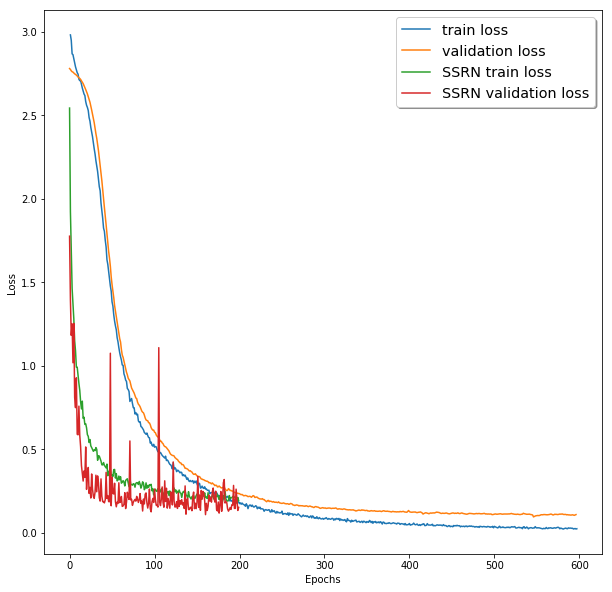

In [59]:
fig = plt.figure(figsize=(10,10))
plt.plot(x_ip,ip_train_loss,linestyle='-',label = 'train loss')
plt.plot(ip_validation_loss,linestyle='-',label='validation loss')
plt.plot(ssrn_ip_train_loss,label='SSRN train loss')
plt.plot(ssrn_ip_validation_loss,linestyle='-',label='SSRN validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame()
plt.savefig('../images/ip_loss.png')
plt.show()

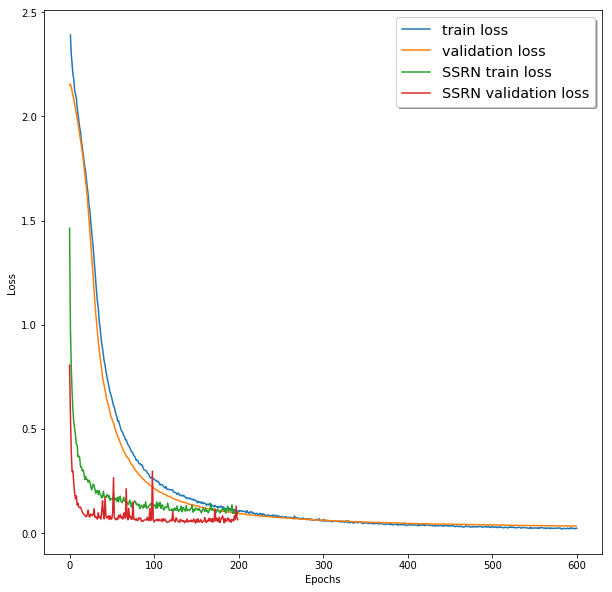

In [58]:
fig = plt.figure(figsize=(10,10))
plt.plot(x_up[:600],up_train_loss[:600],label = 'train loss')
plt.plot(up_validation_loss[:600],label='validation loss')
plt.plot(ssrn_up_train_loss,label='SSRN train loss')
plt.plot(ssrn_up_validation_loss,label='SSRN validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame()
plt.savefig('../images/up_loss.png')
plt.show()